In [50]:
import pandas as pd
import numpy as np
import seaborn as sea

In [51]:
df = pd.read_csv(r'C:\Users\prana\PycharmProjects\Data_Science_Files\Datasets\CO2 Emissions_Canada.csv')
df

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,10.7,7.7,9.4,30,219
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,11.2,8.3,9.9,29,232
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS8,Z,11.7,8.6,10.3,27,240
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS8,Z,11.2,8.3,9.9,29,232


In [52]:
df.drop(["Make", "Model", "Vehicle Class", "Transmission", "Fuel Type", "Fuel Consumption City (L/100 km)", "Fuel Consumption City (L/100 km)", "Fuel Consumption Comb (L/100 km)"], axis=1, inplace=True)

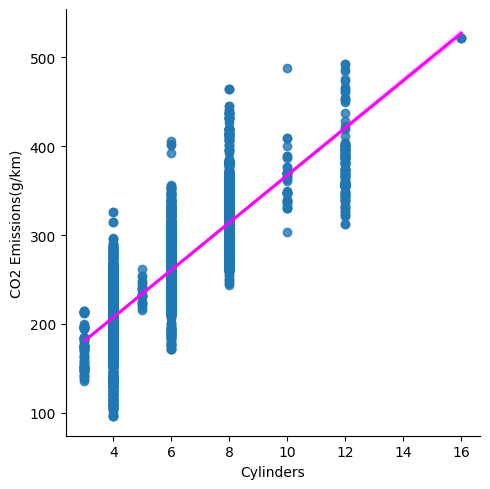

In [53]:
sea.lmplot(data=df, x='Cylinders', y='CO2 Emissions(g/km)', line_kws={'color': '#FF00FF'})

In [54]:
xBar = df['Engine Size(L)'].mean()
yBar = df['CO2 Emissions(g/km)'].mean()

In [55]:
xBar, yBar

## sigma((x - xBar) * (y - yBar) / (x - xBar) ** 2)

(np.float64(3.160067704807041), np.float64(250.58469871360867))

In [56]:
df['numerator'] = (df['Engine Size(L)'] - xBar) * (df['CO2 Emissions(g/km)'] - yBar)
df['denominator'] = ((df['Engine Size(L)'] - xBar) ** 2)

In [57]:
df

,Engine Size(L),Cylinders,Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km),numerator,denominator
0,2.0,4,6.7,33,196,63.321946,1.345757
1,2.4,4,7.7,29,221,22.486374,0.577703
2,1.5,4,5.8,48,136,190.218358,2.755825
3,3.5,6,9.1,25,255,1.500904,0.115554
4,3.5,6,8.7,27,244,-2.238352,0.115554
...,...,...,...,...,...,...,...
7380,2.0,4,7.7,30,219,36.640389,1.345757
7381,2.0,4,8.3,29,232,21.559509,1.345757
7382,2.0,4,8.6,27,240,12.278967,1.345757
7383,2.0,4,8.3,29,232,21.559509,1.345757


In [58]:
thetaOne = df['numerator'].sum() / df['denominator'].sum()
thetaOne

np.float64(36.777315186419436)